# Practice Lecture 16: Training DNN
In this lab we will look at how to train Deep Neural Networks for classification and regression. \
Based on Chapter 11 from Aurelien Geron's book, Hands-on Machine Learning with Scikit-Learn Keras & Tensorflow.\
Original code examples from book in github [here](https://github.com/ageron/handson-ml2)

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/dtrad/geoml_course/blob/master/Practice16_trainingDNN.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [108]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


## Exercise 1: activation functions
Plot activation functions logit, relu and leaky-relu

In [109]:
z=np.arange(-5,5,0.1)

In [110]:
def logit(z):
    return 1 / (1 + np.exp(-z))

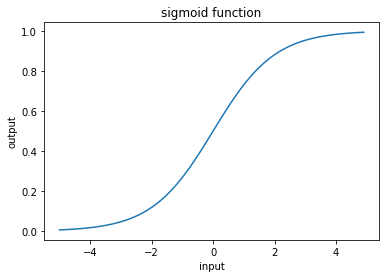

In [111]:
plt.figure()
plt.plot(z,logit(z))
plt.xlabel('input')
plt.ylabel('output')
plt.title('sigmoid function');

In [112]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

when Leaky Relu has coefficient $alpha=0$ it is the same as RELU

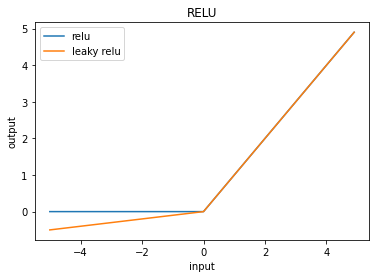

In [113]:
plt.plot(z,leaky_relu(z,0.0),label='relu')
plt.plot(z,leaky_relu(z,0.1),label='leaky relu')
plt.legend()
plt.xlabel('input')
plt.ylabel('output')
plt.title('RELU');

## Exercise 2: training for MNIST with different activation functions and initialization
Train a network for MNIST data using leaky_relu and compare with relu and sigmoid. Also compare two different initializations "he_init" and "zeros".\
For each case plot the loss and validations curves and evaluate on the test data.\
What works and what doesn't?

In [114]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

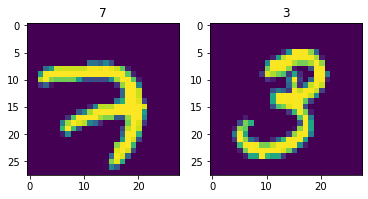

In [115]:
plt.figure()
plt.subplot(121);plt.imshow(X_train[0]);plt.title(y_train[0]);
plt.subplot(122);plt.imshow(X_train[1]);plt.title(y_train[1]);


In [116]:
dir(keras.initializers)

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [117]:
[m for m in dir(keras.initializers) if not m.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [118]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [119]:
[m for m in dir(keras.layers)]

['AbstractRNNCell',
 'Activation',
 'ActivityRegularization',
 'Add',
 'AdditiveAttention',
 'AlphaDropout',
 'Attention',
 'Average',
 'AveragePooling1D',
 'AveragePooling2D',
 'AveragePooling3D',
 'AvgPool1D',
 'AvgPool2D',
 'AvgPool3D',
 'BatchNormalization',
 'Bidirectional',
 'CategoryEncoding',
 'CenterCrop',
 'Concatenate',
 'Conv1D',
 'Conv1DTranspose',
 'Conv2D',
 'Conv2DTranspose',
 'Conv3D',
 'Conv3DTranspose',
 'ConvLSTM1D',
 'ConvLSTM2D',
 'ConvLSTM3D',
 'Convolution1D',
 'Convolution1DTranspose',
 'Convolution2D',
 'Convolution2DTranspose',
 'Convolution3D',
 'Convolution3DTranspose',
 'Cropping1D',
 'Cropping2D',
 'Cropping3D',
 'Dense',
 'DenseFeatures',
 'DepthwiseConv1D',
 'DepthwiseConv2D',
 'Discretization',
 'Dot',
 'Dropout',
 'ELU',
 'Embedding',
 'Flatten',
 'GRU',
 'GRUCell',
 'GaussianDropout',
 'GaussianNoise',
 'GlobalAveragePooling1D',
 'GlobalAveragePooling2D',
 'GlobalAveragePooling3D',
 'GlobalAvgPool1D',
 'GlobalAvgPool2D',
 'GlobalAvgPool3D',
 'GlobalM

In [120]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [121]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [122]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [123]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_46 (Dense)            (None, 300)               235500    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 300)               0         
                                                                 
 dense_47 (Dense)            (None, 100)               30100     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 100)               0         
                                                                 
 dense_48 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-t

In [124]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 1.5235 - accuracy: 0.6122 - val_loss: 0.9626 - val_accuracy: 0.8014
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7438 - accuracy: 0.8357 - val_loss: 0.5896 - val_accuracy: 0.8566
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5359 - accuracy: 0.8650 - val_loss: 0.4689 - val_accuracy: 0.8776
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4547 - accuracy: 0.8785 - val_loss: 0.4105 - val_accuracy: 0.8938
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4108 - accuracy: 0.8874 - val_loss: 0.3754 - val_accuracy: 0.9002
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3822 - accuracy: 0.8937 - val_loss: 0.3513 - val_accuracy: 0.9046
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3617 - accuracy: 0.8986 - val_loss: 0.3336 - val_accuracy:

In [125]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3027 - accuracy: 0.9164


[0.302682489156723, 0.9164000153541565]

In [127]:
type(history.history)

dict

In [126]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}

In [128]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

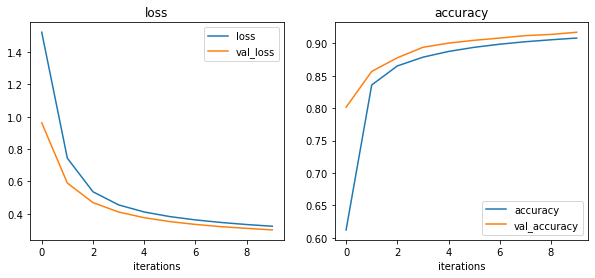

In [129]:
def plot_history(history):
    plt.figure(figsize=(10,4))
    plt.subplot(121);
    plt.plot(history.history["loss"],label='loss')
    plt.plot(history.history["val_loss"],label='val_loss')
    plt.legend()
    plt.xlabel('iterations')
    plt.title('loss')
    plt.subplot(122);
    plt.plot(history.history["accuracy"],label='accuracy')
    plt.plot(history.history["val_accuracy"],label='val_accuracy')
    plt.legend()
    plt.xlabel('iterations')
    plt.title('accuracy');
    
plot_history(history)

Let us compare with the standard RELU activation

In [130]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=[28,28]))
model2.add(keras.layers.Dense(300,activation="relu"))
model2.add(keras.layers.Dense(100,activation="relu"))
model2.add(keras.layers.Dense(10,activation="softmax"))

In [131]:
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [132]:
model2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_49 (Dense)            (None, 300)               235500    
                                                                 
 dense_50 (Dense)            (None, 100)               30100     
                                                                 
 dense_51 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [133]:
history2 = model2.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 1.7350 - accuracy: 0.5672 - val_loss: 1.1557 - val_accuracy: 0.7864
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8737 - accuracy: 0.8252 - val_loss: 0.6622 - val_accuracy: 0.8500
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5897 - accuracy: 0.8613 - val_loss: 0.5040 - val_accuracy: 0.8730
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4827 - accuracy: 0.8775 - val_loss: 0.4306 - val_accuracy: 0.8878
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4265 - accuracy: 0.8877 - val_loss: 0.3872 - val_accuracy: 0.8958
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3909 - accuracy: 0.8954 - val_loss: 0.3585 - val_accuracy: 0.9006
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3658 - accuracy: 0.9002 - val_loss: 0.3367 - val_accuracy:

In [134]:
model2.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2986 - accuracy: 0.9152


[0.29860174655914307, 0.9151999950408936]

In [135]:
print(history.params)
print(history2.params)

{'verbose': 1, 'epochs': 10, 'steps': 1719}
{'verbose': 1, 'epochs': 10, 'steps': 1719}


In [137]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

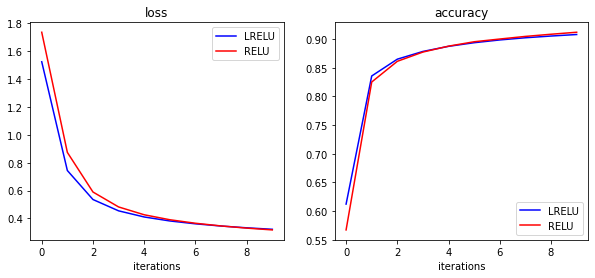

In [136]:
def plot_history(history, history2, case1, case2):
    niter=history.params['epochs']
    niter2=history.params['epochs']
    iter=np.arange(niter)
    iter2=np.arange(niter2)
    plt.figure(figsize=(10,4))
    plt.subplot(121);
    plt.plot(iter,history.history["loss"],'b-',label=case1);plt.plot(iter2,history2.history['loss'],'r-',label=case2)
    plt.xlabel('iterations')
    plt.title('loss')
    plt.legend()
    plt.subplot(122);
    plt.plot(iter,history.history["accuracy"],'b-',label=case1);plt.plot(iter2,history2.history['accuracy'],'r-',label=case2)
    plt.xlabel('iterations')
    plt.title('accuracy');
    plt.legend()
plot_history(history,history2,'LRELU','RELU')

We can see different activation functions implemented in Keras using dir(keras.activations)

In [138]:
model3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal",activation="sigmoid"),
    keras.layers.Dense(100, kernel_initializer="he_normal",activation="sigmoid"),
    keras.layers.Dense(10, activation="softmax")
])
model3.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

In [139]:
history3 = model3.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))


Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 2.3069 - accuracy: 0.1525 - val_loss: 2.2798 - val_accuracy: 0.2234
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 2.2657 - accuracy: 0.2406 - val_loss: 2.2506 - val_accuracy: 0.3174
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 2.2363 - accuracy: 0.3278 - val_loss: 2.2202 - val_accuracy: 0.3652
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 2.2047 - accuracy: 0.3993 - val_loss: 2.1869 - val_accuracy: 0.3992
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 2.1698 - accuracy: 0.4518 - val_loss: 2.1503 - val_accuracy: 0.4774
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 2.1305 - accuracy: 0.5011 - val_loss: 2.1074 - val_accuracy: 0.5176
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 2.0858 - accuracy: 0.5352 - val_loss: 2.0591 - val_accuracy:

In [140]:
model3.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.8701 - accuracy: 0.6393


[1.870111107826233, 0.6392999887466431]

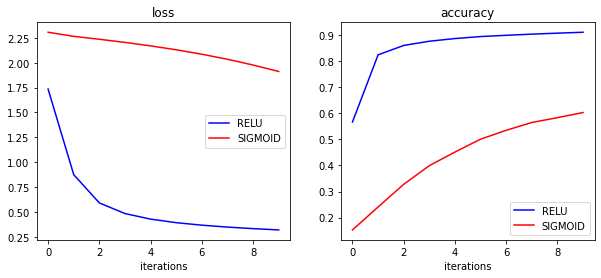

In [141]:
plot_history(history2,history3,'RELU','SIGMOID')

The same for initializers. We can check what is available by dir(keras.initializers)

In [142]:
[m for m in dir(keras.initializers) if not m.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [143]:
model4 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="zeros",activation="sigmoid"),
    keras.layers.Dense(100, kernel_initializer="zeros",activation="sigmoid"),
    keras.layers.Dense(10, activation="softmax")
])
model4.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])
history4 = model4.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
model4.evaluate(X_test,y_test)

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 2.3110 - accuracy: 0.1077 - val_loss: 2.3011 - val_accuracy: 0.1126
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 2.3015 - accuracy: 0.1123 - val_loss: 2.3007 - val_accuracy: 0.1126
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 2.3014 - accuracy: 0.1123 - val_loss: 2.3009 - val_accuracy: 0.1126
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1126
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 2.3014 - accuracy: 0.1123 - val_loss: 2.3017 - val_accuracy: 0.1126
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 2.3014 - accuracy: 0.1123 - val_loss: 2.3010 - val_accuracy: 0.1126
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 2.3013 - accuracy: 0.1123 - val_loss: 2.3009 - val_accuracy:

[2.30086088180542, 0.11349999904632568]

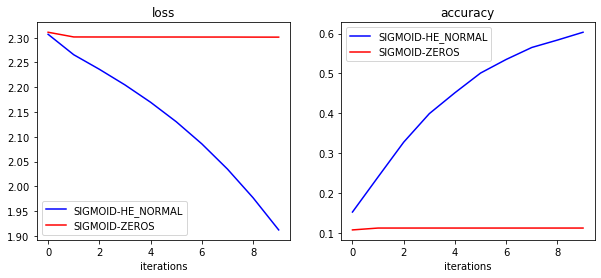

In [144]:
plot_history(history3,history4,'SIGMOID-HE_NORMAL','SIGMOID-ZEROS')

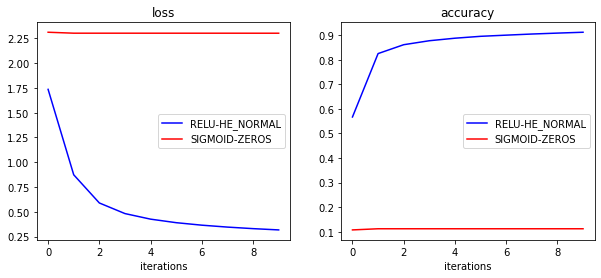

In [145]:
plot_history(history2,history4,'RELU-HE_NORMAL','SIGMOID-ZEROS')

## Exercise 3: 
Use the first model with/without batch normalization. Plot the loss and accuracy curves for training and validation. Do you see any difference?
How many more parameters you need to optimize and why?

In [146]:
model5 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [147]:
model5.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization_3 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_58 (Dense)            (None, 300)               235500    
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 300)               0         
                                                                 
 batch_normalization_4 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_59 (Dense)            (None, 100)             

In [148]:
model5.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])
history5 = model5.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
model5.evaluate(X_test,y_test)

/home/dtrad/anaconda3/envs/tfgpu/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.8649 - accuracy: 0.7347 - val_loss: 0.4800 - val_accuracy: 0.8638
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4768 - accuracy: 0.8615 - val_loss: 0.3732 - val_accuracy: 0.8944
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4050 - accuracy: 0.8829 - val_loss: 0.3274 - val_accuracy: 0.9070
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3666 - accuracy: 0.8931 - val_loss: 0.2997 - val_accuracy: 0.9152
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3400 - accuracy: 0.9015 - val_loss: 0.2775 - val_accuracy: 0.9200
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3207 - accuracy: 0.9066 - val_loss: 0.2633 - val_accuracy: 0.9234
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3057 - accuracy: 0.9097 - val_loss: 0.2509 - val_accuracy:

[0.23638266324996948, 0.9333999752998352]

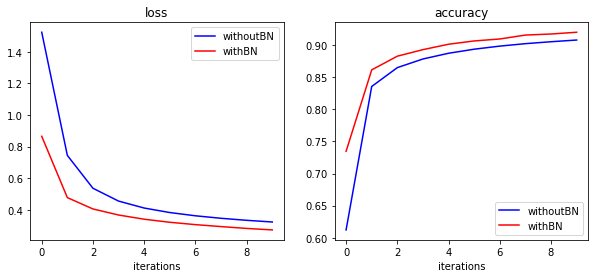

In [149]:
plot_history(history, history5, 'withoutBN','withBN')

## Exercise 4
For the fashion_mnist dataset shown below, create two different data sets A and B.
- Data set A will contain all classes except 8 and 9.
- Data set B will contain classes 8 and 9.
- Create a multiclass classification model for A.
- Create a binary classification model for B.\
For B, instead of training the network from scratch, start from the network trained for data set A. \
Replace the last layer (softmax for multiclass classification) for a sigmoid (binary classification). 

We take the full dataset first

In [150]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Now we split the data into two new data sets, A and B. \
A has 7 classes (all original classes without 8 and 9) and can be classified with multiclass methods.\
B has 2 classes (Bag is false, Ankle Boot is True).\
We will train on the model A and then use it for B.\
That is we will switch from multiclass to binary classification.

In [151]:
print(class_names[8:10])
def split_dataset(X, y):
    y_8_or_9 = (y == 8) | (y == 9) # bag or ankle boots
    y_A = y[~y_8_or_9]    
    y_B = (y[y_8_or_9] == 9).astype(np.float32) # binary classification task, 8 False, 9 True
    return ((X[~y_8_or_9], y_A), (X[y_8_or_9], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
print(X_train_A.shape,y_train_A.shape)
print(X_train_B.shape,y_train_B.shape)
# Select only an small portion of B.
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]
print('After selection',X_train_B.shape,y_train_B.shape)

['Bag', 'Ankle boot']
(43996, 28, 28) (43996,)
(11004, 28, 28) (11004,)
After selection (200, 28, 28) (200,)


Let us check the indexes for model A and model B to make sure we didn't make mistakes.

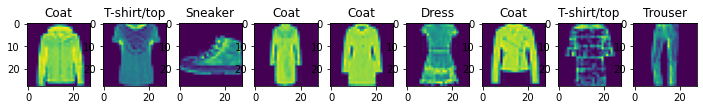

In [153]:
plt.figure(figsize=(12,6))
for i in range(9):    
    plt.subplot(191+i)
    plt.imshow(X_train_A[i]);plt.title(class_names[y_train_A[i]])

In [154]:
class_nameB=['bag','boot']

1.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0


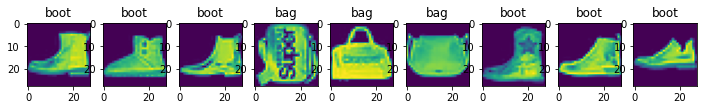

In [155]:
plt.figure(figsize=(12,6))
for i in range(9):
    print(y_train_B[i])
    plt.subplot(191+i)
    plt.imshow(X_train_B[i]);plt.title(class_nameB[np.int8(y_train_B[i])])

Now we start training model A. We build a sequential model as we did before.

In [156]:
tf.random.set_seed(42)
np.random.seed(42)

In [157]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

We train from scratch using the dataset A.

In [158]:
model_A.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])
historyA=model_A.fit(X_train_A,y_train_A,validation_data=(X_valid_A,y_valid_A),epochs=20)

Epoch 1/20
1375/1375 [==============================] - 5s 3ms/step - loss: 0.7970 - accuracy: 0.7202 - val_loss: 0.5710 - val_accuracy: 0.7997
Epoch 2/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.5501 - accuracy: 0.8009 - val_loss: 0.5050 - val_accuracy: 0.8252
Epoch 3/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.5013 - accuracy: 0.8161 - val_loss: 0.4839 - val_accuracy: 0.8299
Epoch 4/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.4739 - accuracy: 0.8258 - val_loss: 0.4635 - val_accuracy: 0.8317
Epoch 5/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.4559 - accuracy: 0.8329 - val_loss: 0.4447 - val_accuracy: 0.8389
Epoch 6/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.4416 - accuracy: 0.8381 - val_loss: 0.4366 - val_accuracy: 0.8367
Epoch 7/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.4295 - accuracy: 0.8429 - val_loss: 0.4271 - val_accuracy:

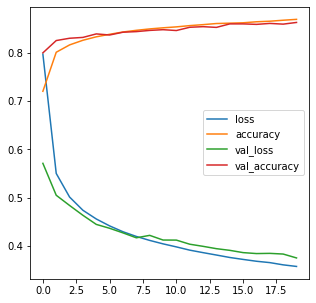

In [159]:
import pandas as pd
def plot_historypd(history):
    pd.DataFrame(history.history).plot(figsize=(5,5))
plot_historypd(historyA)    

In [160]:
model_A.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 784)               0         
                                                                 
 dense_61 (Dense)            (None, 300)               235500    
                                                                 
 dense_62 (Dense)            (None, 100)               30100     
                                                                 
 dense_63 (Dense)            (None, 50)                5050      
                                                                 
 dense_64 (Dense)            (None, 50)                2550      
                                                                 
 dense_65 (Dense)            (None, 50)                2550      
                                                                 
 dense_66 (Dense)            (None, 8)               

The main part of this exercise is to train for dataset B but starting from the model trained in dataset A.\
Notice that model A has never seeing a bag or ankle boot. Let use save the model first.

In [161]:
model_A.save("my_model_A.h5")

Now we will create a new model B by using layers from modelA except for the last one (the softmax with the softmax activation) since these layer was designed for multiclasses.\
We will replace this last layer with a simpler sigmoid (as usual for binary classification).

In [162]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [163]:
for i in np.arange(len(model_A.layers)): 
    print(model_A.layers[i].name,'\t',model_B_on_A.layers[i].name)

flatten_18 	 flatten_18
dense_61 	 dense_61
dense_62 	 dense_62
dense_63 	 dense_63
dense_64 	 dense_64
dense_65 	 dense_65
dense_66 	 dense_67


We need to fix the weights for all layers except the last one we want to change.

In [164]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

In [165]:
model_B_on_A.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 784)               0         
                                                                 
 dense_61 (Dense)            (None, 300)               235500    
                                                                 
 dense_62 (Dense)            (None, 100)               30100     
                                                                 
 dense_63 (Dense)            (None, 50)                5050      
                                                                 
 dense_64 (Dense)            (None, 50)                2550      
                                                                 
 dense_65 (Dense)            (None, 50)                2550      
                                                                 
 dense_67 (Dense)            (None, 1)               

Now let us evaluate the models in the datasets A and B.\
Since model_A was already training for dataset A, it produces a good result for testA

In [166]:
model_A.evaluate(X_test_A, y_test_A)

250/250 [==============================] - 1s 2ms/step - loss: 0.4186 - accuracy: 0.8470


[0.4185638427734375, 0.847000002861023]

The last layer of model_B_on_A has not been trained yet for dataset B. The rest of the layers are good. Let us try it to see if the last layer is important.

In [167]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 1.4765 - accuracy: 0.3545


[1.4764814376831055, 0.3544999957084656]

Let us now train the last layer.

In [168]:
historyB = model_B_on_A.fit(X_train_B, y_train_B, epochs=10, validation_data=(X_valid_B, y_valid_B))
model_B_on_A.evaluate(X_test_B, y_test_B)

Epoch 1/10
7/7 [==============================] - 0s 18ms/step - loss: 1.4460 - accuracy: 0.3550 - val_loss: 1.4233 - val_accuracy: 0.3524
Epoch 2/10
7/7 [==============================] - 0s 15ms/step - loss: 1.3595 - accuracy: 0.3500 - val_loss: 1.3335 - val_accuracy: 0.3484
Epoch 3/10
7/7 [==============================] - 0s 14ms/step - loss: 1.2751 - accuracy: 0.3450 - val_loss: 1.2578 - val_accuracy: 0.3464
Epoch 4/10
7/7 [==============================] - 0s 16ms/step - loss: 1.2031 - accuracy: 0.3450 - val_loss: 1.1824 - val_accuracy: 0.3373
Epoch 5/10
7/7 [==============================] - 0s 15ms/step - loss: 1.1320 - accuracy: 0.3400 - val_loss: 1.1184 - val_accuracy: 0.3404
Epoch 6/10
7/7 [==============================] - 0s 14ms/step - loss: 1.0713 - accuracy: 0.3550 - val_loss: 1.0624 - val_accuracy: 0.3414
Epoch 7/10
7/7 [==============================] - 0s 15ms/step - loss: 1.0177 - accuracy: 0.3700 - val_loss: 1.0035 - val_accuracy: 0.3474
Epoch 8/10
7/7 [===========

[0.8297214508056641, 0.42399999499320984]

In [169]:
y_prob_B = model_B_on_A.predict(X_test_B)

In [170]:
y_prob_B.shape

(2000, 1)

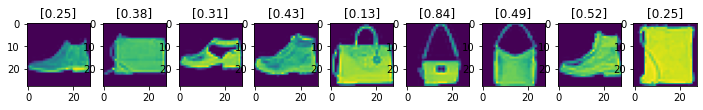

In [171]:
plt.figure(figsize=(12,6))
for i in range(9):    
    plt.subplot(191+i)
    plt.imshow(X_test_B[i]);
    plt.title(str(np.round(y_prob_B[i],2)))
    #plt.title(str(np.round(y_prob_B[i],2))+'->'+class_nameB[int(y_test_B[i])])

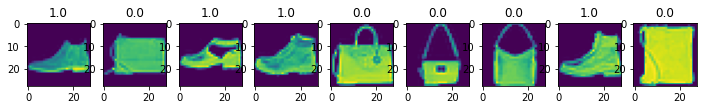

In [172]:
plt.figure(figsize=(12,6))
for i in range(9):    
    plt.subplot(191+i)
    plt.imshow(X_test_B[i]);
    plt.title((y_test_B[i]))

It looks like we need to train a bit more than just the last layer. Let us make them all layers trainable. Let us use very small learning rate.

In [173]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-4), metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=10, validation_data=(X_valid_B, y_valid_B))
model_B_on_A.evaluate(X_test_B, y_test_B)

Epoch 1/10
7/7 [==============================] - 1s 31ms/step - loss: 0.8319 - accuracy: 0.4200 - val_loss: 0.8351 - val_accuracy: 0.4217
Epoch 2/10
7/7 [==============================] - 0s 14ms/step - loss: 0.8046 - accuracy: 0.4550 - val_loss: 0.8100 - val_accuracy: 0.4508
Epoch 3/10
7/7 [==============================] - 0s 15ms/step - loss: 0.7795 - accuracy: 0.4750 - val_loss: 0.7882 - val_accuracy: 0.4759
Epoch 4/10
7/7 [==============================] - 0s 14ms/step - loss: 0.7575 - accuracy: 0.4900 - val_loss: 0.7661 - val_accuracy: 0.4970
Epoch 5/10
7/7 [==============================] - 0s 15ms/step - loss: 0.7351 - accuracy: 0.5150 - val_loss: 0.7458 - val_accuracy: 0.5251
Epoch 6/10
7/7 [==============================] - 0s 15ms/step - loss: 0.7143 - accuracy: 0.5400 - val_loss: 0.7270 - val_accuracy: 0.5472
Epoch 7/10
7/7 [==============================] - 0s 16ms/step - loss: 0.6948 - accuracy: 0.5650 - val_loss: 0.7070 - val_accuracy: 0.5703
Epoch 8/10
7/7 [===========

[0.6298929452896118, 0.6884999871253967]

In [176]:
y_prob_B = model_B_on_A.predict(X_test_B)

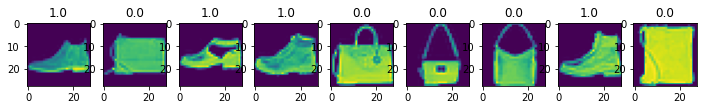

In [177]:
plt.figure(figsize=(12,6))
for i in range(9):    
    plt.subplot(191+i)
    plt.imshow(X_test_B[i]);
    #plt.title(class_nameB[int(y_test_B[i])])
    plt.title(y_test_B[i])

/home/dtrad/anaconda3/envs/tfgpu/lib/python3.9/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


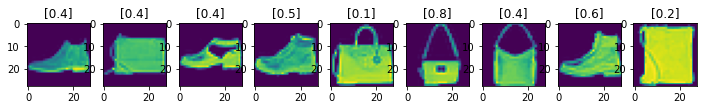

In [178]:
plt.figure(figsize=(12,6))
for i in range(9):    
    plt.subplot(191+i)
    plt.imshow(X_test_B[i]);
    #plt.title(class_nameB[int(y_pred_B[i])])
    plt.title(np.round(y_prob_B[i],1))

In [179]:
y_pred_B = model_B_on_A.predict(X_test_B[:10])
print(y_pred_B)

[[0.35744214]
 [0.39444172]
 [0.4062913 ]
 [0.5432591 ]
 [0.11846466]
 [0.79901874]
 [0.39619252]
 [0.642888  ]
 [0.21499315]
 [0.4642308 ]]


In [ ]:
y_pred_B = (model_B_on_A.predict(X_test_B[:10]))
y_pred_B = np.round(y_pred_B,0)
y_pred_B = y_pred_B.flatten()
print(y_pred_B)

In [ ]:
plt.figure(figsize=(12,6))
for i in range(9):    
    plt.subplot(191+i)
    plt.imshow(X_test_B[i]);
    plt.title(class_nameB[int(y_pred_B[i])])
    

It did the job but not clear if the original training helped at all. To evaluate that, we need to start model B from scratch (model C).

In [ ]:
model_C = keras.models.Sequential()
model_C.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_C.add(keras.layers.Dense(n_hidden, activation="selu"))
model_C.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
model_C.compile(loss="binary_crossentropy",
                 optimizer=keras.optimizers.SGD(lr=1e-3),
                 metrics=["accuracy"])
historyC = model_C.fit(X_train_B, y_train_B, epochs=10,
                  validation_data=(X_valid_B, y_valid_B))
model_C.evaluate(X_test_B, y_test_B)

In [ ]:
plot_historypd(historyC)

In [ ]:
plot_historypd(historyB)

## Exercise 5: Optimizers
Try the classification of the fashion mnist data set using various optimizers.

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [ ]:
optimizer1 = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [ ]:
optimizer2 = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

In [ ]:
optimizer3 = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

In [ ]:
optimizer4 = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer1, metrics=["accuracy"])

In [ ]:
n_epochs = 10
history1 = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer4, metrics=["accuracy"])

In [ ]:
history4 = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

In [ ]:
def plot_history(history, history2, case1, case2):
    niter=history.params['epochs']
    niter2=history.params['epochs']
    iter=np.arange(niter)
    iter2=np.arange(niter2)
    plt.figure(figsize=(10,4))
    plt.subplot(121);
    plt.plot(iter,history.history["loss"],'b-',label=case1);plt.plot(iter2,history2.history['loss'],'r-',label=case2)
    plt.xlabel('iterations')
    plt.title('loss')
    plt.legend()
    plt.subplot(122);
    plt.plot(iter,history.history["accuracy"],'b-',label=case1);plt.plot(iter2,history2.history['accuracy'],'r-',label=case2)
    plt.xlabel('iterations')
    plt.title('accuracy');
    plt.legend()
plot_history(history1,history4,'SGD','ADAM')

## Exercise 6: Learning Rate
Use the exponential rate decay defined below and compare with the previous result.\
We define a function whose job is to define another function. We do this nesting because of the parameters.

In [ ]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.001, s=20)

In [ ]:
lr0=0.001
yy=np.zeros((2,10))
print(yy.shape)
s=[10,20]
for j in (0,1):
    exponential_decay_fn = exponential_decay(lr0,s[j])
    for i in range(10):
        yy[j,i]=(exponential_decay_fn(i))

ii=np.arange(1,11)
plt.plot(ii,yy[0,:],label='batch=10');
plt.plot(ii,yy[1,:],label='batch=20');
plt.xlabel('epochs');plt.ylabel('learning Rate')
plt.legend();


In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer4, metrics=["accuracy"])

In [ ]:
exponential_decay_fn = exponential_decay(lr0=0.001, s=20)

In [ ]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history4b = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

In [ ]:
plot_history(history4,history4b,'ADAM','ADAM_EXPLR')

## Exercise 7: Regularization
Modify the previous network using l2 and l1 regularizations and compare with the previous result. Also compare with Dropout.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer4, metrics=["accuracy"])

In [ ]:
history5 = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l2(0.0001)),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l2(0.0001)),
    keras.layers.Dense(10, activation="softmax",kernel_regularizer=keras.regularizers.l2(0.0001))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer4, metrics=["accuracy"])

In [ ]:
history5b = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

In [ ]:
plot_history(history5,history5b,'ADAM','ADAM_L2')

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l1(0.0001)),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l1(0.0001)),
    keras.layers.Dense(10, activation="softmax",kernel_regularizer=keras.regularizers.l1(0.0001))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer4, metrics=["accuracy"])

In [ ]:
history5c = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

In [ ]:
plot_history(history5b,history5c,'ADAM_L2','ADAM_L1')

## Exercise 8: Dropout
Compare original with regularization using dropout

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer4, metrics=["accuracy"])

In [ ]:
history5d = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

In [ ]:
plot_history(history5,history5d,'ADAM','ADAM_DROPOUT')